In [1]:
%run ../scripts/notebook_settings.py
import sgkit as sg
import xarray as xr
import glob

Some jobs fail. As far as I can determine, this is due to lacking any data in contigs, which should primarily happen for small contigs/when the species is greatly diverged from the reference. Below is a comprehensive check of the proportion lost contigs relative to the overall number of contigs.

In [2]:
vasili_stats = "~/primatediversity/data/gVCFs_recalling_10_12_2024_metadata/plots/SupTable_Sample_Stats_wGT_QC.tsv"
metadata_path = "/home/eriks/primatediversity/data/gVCFs_recalling_10_12_2024_metadata/"

In [3]:
vasili_table = pd.read_csv(vasili_stats, sep="\t")
sub_vasili = vasili_table.loc[(vasili_table.finalQC != "fail")
                              & (vasili_table.cov_chrA >= 20)
                              & (vasili_table.remove_as_relative != True)
                              & (vasili_table.remove_manual != True)
                              & (~vasili_table.ID.str.startswith("SAMEA11633"))
                             ]

s_l, t_l, f_l, tx_l, fx_l = [], [], [], [], []
for species in sub_vasili.species_genotyping.unique()[:]:
    species_inds = sub_vasili.loc[sub_vasili.species_genotyping == species]
    short_form = species.split("_")[0]
    regions_df = pd.read_csv(metadata_path+"{}_regions_and_batches.txt".format(short_form), sep="\t")
    all_paths_zarr = glob.glob("../zarr_20x_inds/{}/*/".format(species))
    all_paths_fail = glob.glob("../zarr_20x_inds/{}/*temp.bcf".format(species))
    zarr_chr = [x.split("/")[-2] for x in all_paths_zarr]
    fail_chr = [x.split("/")[-1].split("_temp")[0] for x in all_paths_fail]
    print(species)
    passing_df = regions_df.loc[regions_df.CONTIG_ID.isin(zarr_chr)]
    failing_df = regions_df.loc[regions_df.CONTIG_ID.isin(fail_chr)]
    #print("Total pass:", passing_df.END.sum(),
    #     "\n Percentage fail:", failing_df.END.sum()/passing_df.END.sum())
    #print("Total pass chrX:", passing_df.loc[(passing_df.MALE_PLOIDY == 1) &
    #                                   (passing_df.FEMALE_PLOIDY == 2)].END.sum(),
    #     "\n Percentage fail chrX:", failing_df.loc[(failing_df.MALE_PLOIDY == 1) &
    #                                   (failing_df.FEMALE_PLOIDY == 2)].END.sum()/passing_df.END.sum())
    s_l.append(species)
    t_l.append(passing_df.END.sum()), f_l.append(failing_df.END.sum())
    tx_l.append(passing_df.loc[(passing_df.MALE_PLOIDY == 1) & (passing_df.FEMALE_PLOIDY == 2)].END.sum())
    fx_l.append(failing_df.loc[(failing_df.MALE_PLOIDY == 1) & (failing_df.FEMALE_PLOIDY == 2)].END.sum())
    
pass_fail_df = pd.DataFrame({"species": s_l, "total_pass": t_l, "total_fail": f_l,
                         "total_pass_chrx": tx_l, "total_fail_chrx": fx_l})
pass_fail_df["total_fail_proportion"] = pass_fail_df.total_fail/pass_fail_df.total_pass

Allenopithecus_nigroviridis_ssp
Aotus_azarai_ssp
Aotus_griseimembra_ssp
Aotus_nancymaae_ssp
Aotus_trivirgatus_ssp
Aotus_vociferans_ssp
Alouatta_belzebul_ssp
Alouatta_caraya_ssp
Alouatta_discolor_ssp
Alouatta_juara_ssp
Alouatta_macconnelli_ssp
Alouatta_palliata_ssp
Alouatta_seniculus_ssp
Ateles_belzebuth_ssp
Ateles_chamek_ssp
Ateles_geoffroyi_ssp
Ateles_marginatus_ssp
Ateles_paniscus_ssp
Brachyteles_hypoxanthus_ssp
Lagothrix_lagotricha_ssp
Callimico_goeldii_ssp
Callithrix_geoffroyi_ssp
Callithrix_jacchus_ssp
Callithrix_kuhlii_ssp
Cebuella_niveiventris_ssp
Cebuella_pygmaea_ssp
Mico_argentatus_ssp
Mico_humeralifer_ssp
Mico_humilis_ssp
Carlito_syrichta_ssp
Cephalopachus_bancanus_ssp
Tarsius_dentatus_ssp
Tarsius_lariang_ssp
Tarsius_wallacei_ssp
Cercopithecus_ascanius_ssp
Cercopithecus_campbelli_ssp
Cercopithecus_cephus_ssp
Cercopithecus_denti_ssp
Cercopithecus_diana_ssp
Cercopithecus_hamlyni_ssp
Cercopithecus_mitis_ssp
Cercopithecus_mona_ssp
Cercopithecus_neglectus_ssp
Cercopithecus_nictita

In [4]:
pass_fail_df.sort_values("total_pass")[:11].species.to_list()

['Varecia_variegata_ssp',
 'Varecia_rubra_ssp',
 'Eulemur_mongoz_ssp',
 'Eulemur_rubriventer_ssp',
 'Cheirogaleus_sibreei_ssp',
 'Cheirogaleus_medius_ssp',
 'Cheirogaleus_major_ssp',
 'Eulemur_coronatus_ssp',
 'Eulemur_flavifrons_ssp',
 'Eulemur_macaco_ssp',
 'Cercopithecus_cephus_ssp']

In [5]:
sub_vasili.loc[sub_vasili.species_genotyping.isin(pass_fail_df.sort_values("total_pass")[:11].species)]

,ID,ID_PGDP,group,family,genus,species,subspecies,species_full,species_short,species_genotyping,...,reason,finalQC,Kuderna_AB_QC,Kuderna_COV_QC,relatives,remove_as_relative,generation,founder,remove_manual,pedigree_source
158,PD_0041,PD_0041,OWM,Cercopithecidae,Cercopithecus,cephus,ssp,Cercopithecus_cephus_ssp,C.cephus_ssp,Cercopithecus_cephus_ssp,...,NaN,ok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159,PD_0094,PD_0094,OWM,Cercopithecidae,Cercopithecus,cephus,ssp,Cercopithecus_cephus_ssp,C.cephus_ssp,Cercopithecus_cephus_ssp,...,NaN,ok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
160,PD_0095,PD_0095,OWM,Cercopithecidae,Cercopithecus,cephus,ssp,Cercopithecus_cephus_ssp,C.cephus_ssp,Cercopithecus_cephus_ssp,...,NaN,ok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200,PD_0605,PD_0605,STR,Cheirogaleidae,Cheirogaleus,major,ssp,Cheirogaleus_major_ssp,C.major_ssp,Cheirogaleus_major_ssp,...,NaN,ok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
203,PD_0606,PD_0606,STR,Cheirogaleidae,Cheirogaleus,medius,ssp,Cheirogaleus_medius_ssp,C.medius_ssp,Cheirogaleus_medius_ssp,...,NaN,ok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
205,SAMN07678072,SAMN07678072,STR,Cheirogaleidae,Cheirogaleus,medius,ssp,Cheirogaleus_medius_ssp,C.medius_ssp,Cheirogaleus_medius_ssp,...,NaN,ok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207,SAMN11334321,SAMN11334321,STR,Cheirogaleidae,Cheirogaleus,medius,ssp,Cheirogaleus_medius_ssp,C.medius_ssp,Cheirogaleus_medius_ssp,...,NaN,ok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208,SAMN11334320,SAMN11334320,STR,Cheirogaleidae,Cheirogaleus,sibreei,ssp,Cheirogaleus_sibreei_ssp,C.sibreei_ssp,Cheirogaleus_sibreei_ssp,...,NaN,warn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
431,PD_0151,PD_0151,STR,Lemuridae,Eulemur,coronatus,ssp,Eulemur_coronatus_ssp,E.coronatus_ssp,Eulemur_coronatus_ssp,...,NaN,ok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
432,PD_0611,PD_0611,STR,Lemuridae,Eulemur,coronatus,ssp,Eulemur_coronatus_ssp,E.coronatus_ssp,Eulemur_coronatus_ssp,...,NaN,ok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
pass_fail_df.sort_values("total_pass")[:20]

,species,total_pass,total_fail,total_pass_chrx,total_fail_chrx,total_fail_proportion
250,Varecia_variegata_ssp,1862770237,0,95448993,0,0.0
249,Varecia_rubra_ssp,1862770237,0,95448993,0,0.0
63,Eulemur_mongoz_ssp,1890777747,0,103121626,0,0.0
64,Eulemur_rubriventer_ssp,1890777747,0,103121626,0,0.0
50,Cheirogaleus_sibreei_ssp,2078483261,0,107312693,0,0.0
49,Cheirogaleus_medius_ssp,2078483261,0,107312693,0,0.0
48,Cheirogaleus_major_ssp,2078483261,0,107312693,0,0.0
60,Eulemur_coronatus_ssp,2079190388,0,111878440,0,0.0
61,Eulemur_flavifrons_ssp,2079190388,0,111878440,0,0.0
62,Eulemur_macaco_ssp,2079190388,0,111878440,0,0.0


In [7]:
pass_fail_df.sort_values("total_fail")[-20:]

,species,total_pass,total_fail,total_pass_chrx,total_fail_chrx,total_fail_proportion
212,Saguinus_imperator_ssp,3131198283,16706901,148490209,0,0.005336
214,Saguinus_labiatus_ssp,3129930405,17974779,148490209,0,0.005743
66,Eulemur_collaris_ssp,2301454081,19461830,144850586,0,0.008456
85,Prolemur_simus_ssp,2192284454,22345802,73531725,0,0.010193
56,Erythrocebus_patas_ssp,3006999944,22850367,151995220,0,0.007599
216,Saguinus_mystax_ssp,3122103436,25801748,148490209,0,0.008264
70,Eulemur_sanfordi_ssp,2294903708,26012203,144850586,0,0.011335
213,Saguinus_inustus_ssp,3120169550,27735634,148490209,0,0.008889
65,Eulemur_albifrons_ssp,2290960406,29955505,144850586,0,0.013076
82,Hapalemur_griseus_ssp,2184337450,30292806,73531725,0,0.013868


In [8]:
pass_fail_df.sort_values("total_pass_chrx")[:10]

,species,total_pass,total_fail,total_pass_chrx,total_fail_chrx,total_fail_proportion
31,Tarsius_dentatus_ssp,2469445461,0,0,0,0.000000
32,Tarsius_lariang_ssp,2469445461,0,0,0,0.000000
29,Carlito_syrichta_ssp,2469445461,0,0,0,0.000000
30,Cephalopachus_bancanus_ssp,2469445461,0,0,0,0.000000
33,Tarsius_wallacei_ssp,2469445461,0,0,0,0.000000
84,Lemur_catta_ssp,2214630256,0,73531725,0,0.000000
85,Prolemur_simus_ssp,2192284454,22345802,73531725,0,0.010193
82,Hapalemur_griseus_ssp,2184337450,30292806,73531725,0,0.013868
83,Hapalemur_meridionalis_ssp,2182706472,31923784,73531725,0,0.014626
249,Varecia_rubra_ssp,1862770237,0,95448993,0,0.000000


Checking the distribution of heterozygosity/alternate homozygous.

In [9]:
output_df = pd.read_csv("../results/window_stats_20x_inds/Rhinopithecus_brelichi_ssp_10kb_het_hom.txt",
                        sep="\t")
output_df

,het,alt_hom,variant_count,GVCF_ID,window_start,chrom,window_end,callable_frac,chr_type,species
0,0.0,0,0,SAMN03076574,0,NC_044565.1,10000,0.0000,aut,Rhinopithecus_brelichi_ssp
1,0.0,18,18,SAMN03076574,10000,NC_044565.1,20000,0.5729,aut,Rhinopithecus_brelichi_ssp
2,0.0,18,18,SAMN03076574,20000,NC_044565.1,30000,0.9726,aut,Rhinopithecus_brelichi_ssp
3,0.0,18,18,SAMN03076574,30000,NC_044565.1,40000,0.9544,aut,Rhinopithecus_brelichi_ssp
4,0.0,19,21,SAMN03076574,40000,NC_044565.1,50000,0.9174,aut,Rhinopithecus_brelichi_ssp
...,...,...,...,...,...,...,...,...,...,...
294664,5.0,10,31,SAMN03076574,134980000,NC_044561.1,134990000,0.6858,aut,Rhinopithecus_brelichi_ssp
294665,33.0,16,68,SAMN03076574,134990000,NC_044561.1,135000000,0.8769,aut,Rhinopithecus_brelichi_ssp
294666,9.0,22,55,SAMN03076574,135000000,NC_044561.1,135010000,0.9911,aut,Rhinopithecus_brelichi_ssp
294667,2.0,69,76,SAMN03076574,135010000,NC_044561.1,135020000,0.9901,aut,Rhinopithecus_brelichi_ssp


<Axes: xlabel='alt_hom', ylabel='het'>

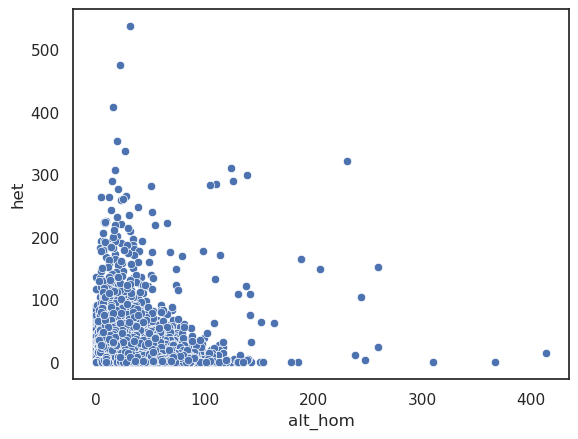

In [10]:
sns.scatterplot(output_df, y="het", x="alt_hom")

<Axes: xlabel='alt_hom', ylabel='het'>

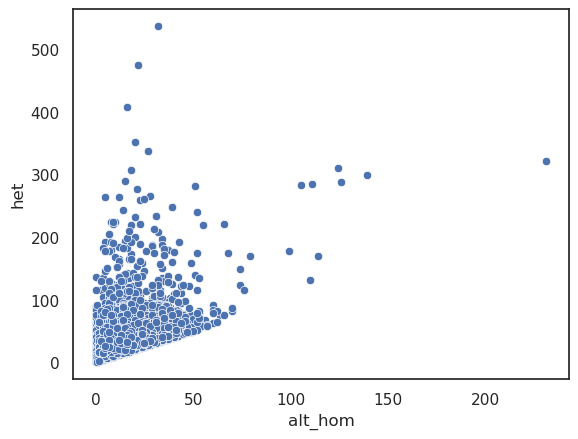

In [11]:
sns.scatterplot(output_df.loc[output_df.het > output_df.alt_hom], y="het", x="alt_hom")

In [12]:
len(output_df.loc[output_df.het > output_df.alt_hom])/(len(output_df))

0.15516732333567496

In [13]:
output_df.loc[(output_df.het > output_df.alt_hom*2+10) & (output_df.callable_frac >= 0.9)]

,het,alt_hom,variant_count,GVCF_ID,window_start,chrom,window_end,callable_frac,chr_type,species
150,51.0,14,73,SAMN03076574,1500000,NC_044565.1,1510000,0.9837,aut,Rhinopithecus_brelichi_ssp
185,65.0,26,112,SAMN03076574,1850000,NC_044565.1,1860000,0.9881,aut,Rhinopithecus_brelichi_ssp
186,60.0,15,84,SAMN03076574,1860000,NC_044565.1,1870000,0.9540,aut,Rhinopithecus_brelichi_ssp
188,23.0,2,91,SAMN03076574,1880000,NC_044565.1,1890000,0.9980,aut,Rhinopithecus_brelichi_ssp
200,23.0,5,33,SAMN03076574,2000000,NC_044565.1,2010000,0.9944,aut,Rhinopithecus_brelichi_ssp
...,...,...,...,...,...,...,...,...,...,...
294625,26.0,7,34,SAMN03076574,134590000,NC_044561.1,134600000,0.9601,aut,Rhinopithecus_brelichi_ssp
294644,76.0,8,88,SAMN03076574,134780000,NC_044561.1,134790000,0.9171,aut,Rhinopithecus_brelichi_ssp
294645,151.0,6,223,SAMN03076574,134790000,NC_044561.1,134800000,0.9824,aut,Rhinopithecus_brelichi_ssp
294654,49.0,7,56,SAMN03076574,134880000,NC_044561.1,134890000,0.9868,aut,Rhinopithecus_brelichi_ssp


In [14]:
from scipy.stats import binomtest
binomtest(115, n=215, p=0.5, alternative='greater')

BinomTestResult(k=115, n=215, alternative='greater', statistic=0.5348837209302325, pvalue=0.16985028376712127)

In [16]:
for df_path in glob.glob("../results/window_stats_20x_inds/*_10kb_het_hom.txt"):
    print(df_path)
    output_df = pd.read_csv(df_path, sep="\t")
    print(len(output_df), len(output_df)/len(output_df.GVCF_ID.unique()), output_df.GVCF_ID.unique())
    print("Percentage well covered:", len(output_df.loc[output_df.callable_frac > 0.75])/(len(output_df)+1))
    chrx_df = output_df.loc[output_df.chr_type == "chrX"]
    print("Percentage well covered chrX:",len(chrx_df.loc[chrx_df.callable_frac > 0.75])/(len(chrx_df)+1))
    print("ChrX percentage (usable):",
          len(chrx_df.loc[chrx_df.callable_frac > 0.75])/(len(output_df.loc[output_df.callable_frac > 0.75])))

../results/window_stats_20x_inds/Propithecus_edwardsi_ssp_10kb_het_hom.txt
260030 260030.0 ['PD_0169']
Percentage well covered: 0.5984786429310351
Percentage well covered chrX: 0.6020303827052293
ChrX percentage (usable): 0.05296774898311946
../results/window_stats_20x_inds/Gorilla_gorilla_ssp_10kb_het_hom.txt
10085011 347759.0 ['SAMEA5204233' 'SAMEA5204234' 'SAMEA5204236' 'SAMEA5204238'
 'SAMN01920484' 'SAMN01920485' 'SAMN01920486' 'SAMN01920487'
 'SAMN01920488' 'SAMN12714420' 'SAMN12714421' 'SAMN35877944' 'PD_0180'
 'PD_0183' 'PD_0184' 'PD_0186' 'PD_0187' 'PD_0188' 'PD_0190' 'PD_0191'
 'PD_0192' 'PD_0193' 'PD_0194' 'PD_0195' 'PD_0196' 'PD_0197' 'PD_0198'
 'PD_0260' 'SAMEA2446072']
Percentage well covered: 0.7986363328075365
Percentage well covered chrX: 0.8091789409900252
ChrX percentage (usable): 0.051729538801654824
../results/window_stats_20x_inds/Mico_argentatus_ssp_10kb_het_hom.txt
1119868 279967.0 ['PD_0117' 'PD_0162' 'PD_0281' 'PD_0283']
Percentage well covered: 0.904973706746

278927 278927.0 ['PD_0045']
Percentage well covered: 0.9223993288590604
Percentage well covered chrX: 0.8310897435897436
ChrX percentage (usable): 0.04031358465192026
../results/window_stats_20x_inds/Pongo_tapanuliensis_ssp_10kb_het_hom.txt
319034 319034.0 ['SAMEA104361543']
Percentage well covered: 0.18335605811274625
Percentage well covered chrX: 0.15186369787181694
ChrX percentage (usable): 0.04220729268167598
../results/window_stats_20x_inds/Eulemur_collaris_ssp_10kb_het_hom.txt
906048 226512.0 ['PD_0150' 'PD_0247' 'PD_0610' 'SAMN25565061']
Percentage well covered: 0.9266695289106881
Percentage well covered chrX: 0.7984534925867753
ChrX percentage (usable): 0.05509714057036141
../results/window_stats_20x_inds/Aotus_griseimembra_ssp_10kb_het_hom.txt
834720 278240.0 ['PD_0802' 'PD_0803' 'PD_0804']
Percentage well covered: 0.9085814302024269
Percentage well covered chrX: 0.8966532162354617
ChrX percentage (usable): 0.0498093384598345
../results/window_stats_20x_inds/Cebus_olivaceus_ss

Percentage well covered: 0.9568946710867008
Percentage well covered chrX: 0.9399446318677597
ChrX percentage (usable): 0.052939297007267905
../results/window_stats_20x_inds/Piliocolobus_badius_ssp_10kb_het_hom.txt
279031 279031.0 ['PD_0039']
Percentage well covered: 0.8504830987126925
Percentage well covered chrX: 0.7113782051282052
ChrX percentage (usable): 0.03741066612729234
../results/window_stats_20x_inds/Hoolock_leuconedys_ssp_10kb_het_hom.txt
552114 276057.0 ['SAMN23530507' 'SAMN43386187']
Percentage well covered: 0.9751301812122475
Percentage well covered chrX: 0.9676584734799483
ChrX percentage (usable): 0.05140568813337692
../results/window_stats_20x_inds/Cebus_albifrons_ssp_10kb_het_hom.txt
1034188 258547.0 ['PD_0078' 'PD_0141' 'PD_0402' 'SAMN23530500']
Percentage well covered: 0.9588885590544862
Percentage well covered chrX: 0.9356733984470935
ChrX percentage (usable): 0.04994393307464565
../results/window_stats_20x_inds/Pan_troglodytes_ssp_10kb_het_hom.txt
29522486 314069.

472088 236044.0 ['PD_0155' 'SAMN23530506']
Percentage well covered: 0.843569750619057
Percentage well covered chrX: 0.647469654528478
ChrX percentage (usable): 0.0435315387705906
../results/window_stats_20x_inds/Macaca_brunnescens_ssp_10kb_het_hom.txt
304387 304387.0 ['SAMN07508135']
Percentage well covered: 0.7607757204620419
Percentage well covered chrX: 0.7299868561056518
ChrX percentage (usable): 0.05036468296980192
../results/window_stats_20x_inds/Aotus_nancymaae_ssp_10kb_het_hom.txt
3810690 293130.0 ['SAMN08978224' 'SAMN08978227' 'SAMN08978229' 'SAMN08978230'
 'SAMN08978231' 'SAMN08978234' 'SAMN08978235' 'SAMN08978239'
 'SAMN08978244' 'SAMN08978245' 'SAMN08978248' 'SAMN08978249'
 'SAMN08978250']
Percentage well covered: 0.8845390507915756
Percentage well covered chrX: 0.9377618815487504
ChrX percentage (usable): 0.050793528356827426
../results/window_stats_20x_inds/Propithecus_diadema_ssp_10kb_het_hom.txt
780078 260026.0 ['PD_0168' 'PD_0251' 'SAMN03010333']
Percentage well covere

853662 284554.0 ['SAMD00215312' 'SAMN12512033' 'SAMN15061836']
Percentage well covered: 0.9533469296431965
Percentage well covered chrX: 0.933995479440146
ChrX percentage (usable): 0.052805414352013975
../results/window_stats_20x_inds/Arctocebus_calabarensis_ssp_10kb_het_hom.txt
286380 286380.0 ['PD_0145']
Percentage well covered: 0.07866443653734012
Percentage well covered chrX: 0.06485880531682059
ChrX percentage (usable): 0.05393288352272727
../results/window_stats_20x_inds/Alouatta_seniculus_ssp_10kb_het_hom.txt
4686516 260362.0 ['PD_0026' 'PD_0137' 'PD_0419' 'PD_0426' 'PD_0430' 'PD_0025' 'PD_0072'
 'PD_0134' 'PD_0136' 'PD_0298' 'PD_0412' 'PD_0414' 'PD_0418' 'PD_0422'
 'PD_0423' 'PD_0424' 'PD_0425' 'PD_0428']
Percentage well covered: 0.7927384025279328
Percentage well covered chrX: 0.7623659521490099
ChrX percentage (usable): 0.05076574983405927
../results/window_stats_20x_inds/Saguinus_mystax_ssp_10kb_het_hom.txt
309509 309509.0 ['PD_0351']
Percentage well covered: 0.8066879906949

Percentage well covered: 0.943989163922765
Percentage well covered chrX: 0.898960141408029
ChrX percentage (usable): 0.04970652616081979
../results/window_stats_20x_inds/Callithrix_kuhlii_ssp_10kb_het_hom.txt
279970 279970.0 ['SAMN03275522']
Percentage well covered: 0.9008540170231917
Percentage well covered chrX: 0.7874889388060717
ChrX percentage (usable): 0.045869959121853356
../results/window_stats_20x_inds/Leontocebus_fuscicollis_ssp_10kb_het_hom.txt
1242172 310543.0 ['PD_0118' 'PD_0123' 'PD_0347' 'PD_0352']
Percentage well covered: 0.799428098984602
Percentage well covered chrX: 0.7995151596774465
ChrX percentage (usable): 0.047825438960432134
../results/window_stats_20x_inds/Pithecia_vanzolinii_ssp_10kb_het_hom.txt
240267 240267.0 ['PD_0015']
Percentage well covered: 0.9903607638137413
Percentage well covered chrX: 0.9763560500695411
ChrX percentage (usable): 0.053103146853146856
../results/window_stats_20x_inds/Loris_tardigradus_ssp_10kb_het_hom.txt
572338 286169.0 ['PD_0626' '

Percentage well covered: 0.9448013813460705
Percentage well covered chrX: 0.9012743220748698
ChrX percentage (usable): 0.049791358607715476
../results/window_stats_20x_inds/Ateles_chamek_ssp_10kb_het_hom.txt
2604260 260426.0 ['PD_0074' 'PD_0139' 'PD_0140' 'PD_0300' 'PD_0301' 'PD_0302' 'PD_0303'
 'PD_0431' 'PD_0432' 'PD_0433']
Percentage well covered: 0.9740498360187401
Percentage well covered chrX: 0.954373149205841
ChrX percentage (usable): 0.05170932084456849
../results/window_stats_20x_inds/Papio_papio_ssp_10kb_het_hom.txt
3007719 273429.0 ['SAMEA112483028' 'SAMEA112483029' 'SAMEA112483031' 'SAMEA112483032'
 'SAMEA112483033' 'SAMEA112483034' 'SAMEA112483035' 'SAMEA112483036'
 'SAMEA112483037' 'SAMEA112483038' 'SAMEA112483039']
Percentage well covered: 0.9450128336414294
Percentage well covered chrX: 0.9021102851719504
ChrX percentage (usable): 0.04982700836706735
../results/window_stats_20x_inds/Trachypithecus_phayrei_ssp_10kb_het_hom.txt
837510 279170.0 ['PD_0048' 'SAMN23530524' 'P

1964382 280626.0 ['SAMN02900448' 'SAMN02900449' 'SAMN02900450' 'SAMN02900452'
 'SAMN02900453' 'SAMN02900454' 'SAMN03199810']
Percentage well covered: 0.88148237894545
Percentage well covered chrX: 0.8323751485186462
ChrX percentage (usable): 0.05016837330767645
../results/window_stats_20x_inds/Alouatta_macconnelli_ssp_10kb_het_hom.txt
1301675 260335.0 ['PD_0005' 'PD_0089' 'PD_0135' 'PD_0416' 'PD_0417']
Percentage well covered: 0.7826409951477941
Percentage well covered chrX: 0.7552856893237813
ChrX percentage (usable): 0.05091558731576597
../results/window_stats_20x_inds/Lepilemur_ankaranensis_ssp_10kb_het_hom.txt
490614 245307.0 ['PD_0245' 'PD_0248']
Percentage well covered: 0.2945405256667652
Percentage well covered chrX: 0.24900817607893194
ChrX percentage (usable): 0.049949483066447066
../results/window_stats_20x_inds/Eulemur_coronatus_ssp_10kb_het_hom.txt
415854 207927.0 ['PD_0151' 'PD_0611']
Percentage well covered: 0.981452669800772
Percentage well covered chrX: 0.94123430307905

840435 280145.0 ['PD_0795' 'PD_0796' 'PD_0797']
Percentage well covered: 0.9063260022178964
Percentage well covered chrX: 0.8975862150808155
ChrX percentage (usable): 0.049648881659531394
../results/window_stats_20x_inds/Carlito_syrichta_ssp_10kb_het_hom.txt
247141 247141.0 ['PD_0629']
Percentage well covered: 0.8496653745619926
Percentage well covered chrX: 0.0
ChrX percentage (usable): 0.0
../results/window_stats_20x_inds/Cercopithecus_campbelli_ssp_10kb_het_hom.txt
425500 212750.0 ['PD_0043' 'SAMN37320050']
Percentage well covered: 0.9858308206091172
Percentage well covered chrX: 0.9799041520679795
ChrX percentage (usable): 0.058006255483083496
../results/window_stats_20x_inds/Eulemur_fulvus_ssp_10kb_het_hom.txt
228099 228099.0 ['PD_0613']
Percentage well covered: 0.9203024989039895
Percentage well covered chrX: 0.8055229547808077
ChrX percentage (usable): 0.05558281448735477
../results/window_stats_20x_inds/Plecturocebus_moloch_ssp_10kb_het_hom.txt
271380 271380.0 ['PD_0344']
Perce

In [ ]:
female_list = sub_vasili.loc[sub_vasili.gSEX == "F"].ID
female_list

In [ ]:
s_l, ind_t_l, t_l, x_l = [], [], [], []
pt_l, px_l = [], []
het_aut_l, het_x_l = [], []
high_het_aut_l, high_het_x_l, outlier_total_aut, outlier_total_x = [], [], [], []
for df_path in glob.glob("../results/window_stats_20x_inds/*_10kb_het_hom.txt")[:]:
    species = df_path.split("/")[-1].split("_10kb")[0]
    print(species)
    output_df = pd.read_csv(df_path, sep="\t")
    ind_count = len(output_df.GVCF_ID.unique())
    s_l.append(species)
    ind_t_l.append(ind_count)
    t_l.append(len(output_df)/ind_count)
    x_l.append(len(output_df.loc[output_df.chr_type == "chrX"])/ind_count)
    pt_l.append(len(output_df.loc[output_df.callable_frac >= 0.9])/ind_count)
    px_l.append(len(output_df.loc[(output_df.callable_frac >= 0.9) &
                                  (output_df.chr_type == "chrX")])/ind_count)
    het_aut_l.append(output_df.loc[(output_df.callable_frac >= 0.9) &
                                  (output_df.chr_type == "aut")].het.mean())
    female_chrx = output_df.loc[(output_df.chr_type == "chrX") &
                                (output_df.GVCF_ID.isin(female_list))]
    het_x_l.append(female_chrx.loc[(female_chrx.callable_frac >= 0.9) ].het.mean())
    high_het_aut_l.append(output_df.loc[(output_df.callable_frac >= 0.9) &
                                  (output_df.chr_type == "aut") &
                                       (output_df.het >= output_df.alt_hom+15)].het.mean())
    high_het_x_l.append(female_chrx.loc[(female_chrx.callable_frac >= 0.9) &
                                       (female_chrx.het >= female_chrx.alt_hom+15)].het.mean())
    outlier_total_aut.append(len(output_df.loc[(output_df.callable_frac >= 0.9) &
                                  (output_df.chr_type == "aut") &
                                       (output_df.het >= output_df.alt_hom+15)])/ind_count)
    outlier_total_x.append(len(female_chrx.loc[(female_chrx.callable_frac >= 0.9) &
                                       (female_chrx.het >= female_chrx.alt_hom+15)])/ind_count)
    
het_df = pd.DataFrame({"species": s_l, "sample_count": ind_t_l, "total_all": t_l, "total_x": x_l, "total_pass_all": pt_l,
                      "total_pass_x": px_l, "het_aut": het_aut_l, "het_x": het_x_l,
                      "outlier_aut": high_het_aut_l, "outlier_x": high_het_x_l,
                       "outlier_total_aut": outlier_total_aut, "outlier_total_x": outlier_total_x})

In [ ]:
female_chrx

In [ ]:
het_df

In [ ]:
sns.scatterplot(het_df, x="total_pass_all", y="total_pass_x")

In [ ]:
sns.scatterplot(het_df, x="het_aut", y="het_x")

In [ ]:
sns.scatterplot(het_df, x="outlier_aut", y="outlier_x")

In [ ]:
sns.scatterplot(het_df, x="outlier_total_aut", y="outlier_total_x")